# STATS 707 Assignment 2
Chase Robertson  
  crob873

## 1.
During the two previous decades, the number of earthquakes in an area average 1.4 per year. In the current 5 year period, the number of earthquakes in this area have been 0,1,1,0,1.

- With α ≤ 0.1, formulate a test of the null hypothesis that the current earthquake rate is the same in the last 5 years as it was before against the alternative that the rate is different.  

A test that the current rate is the same as usual should be a two-sided test. Because our situation is best modeled by a Poisson distribution, which is not symmetric, we will have to identify a rejection region for each side of the distribution separately. Once rejection regions are identified for earthquake rates either significantly less or more than our expected sum of 7, we can decide if our recent sum of 3 is probable.

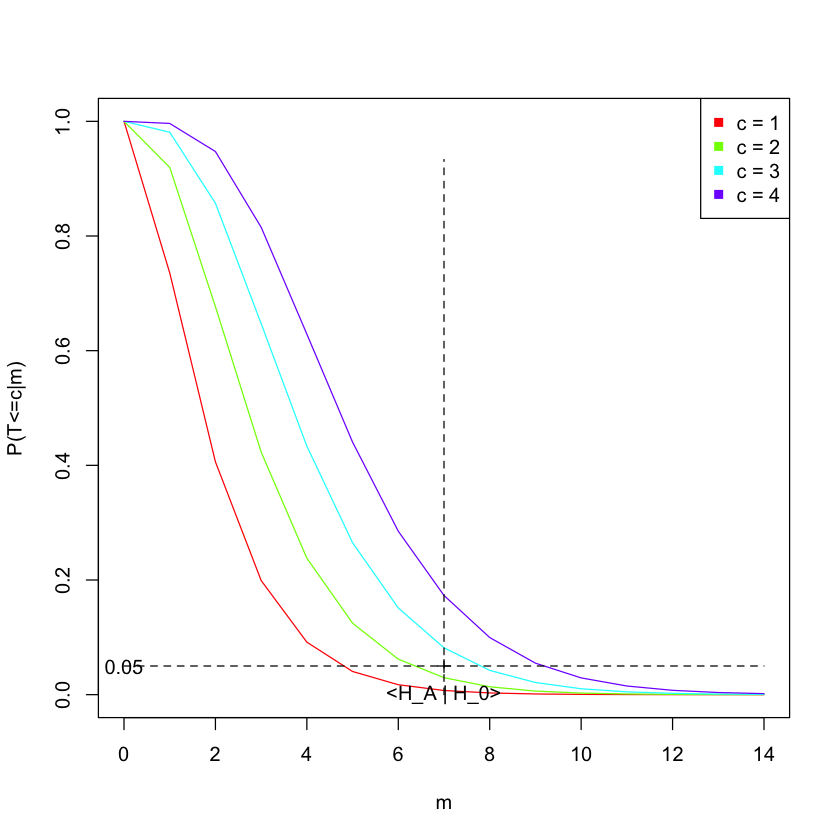

In [1]:
# choose lower bound of null hypothesis acceptance region

alpha = 0.1/2 # max acceptable type 1 error for one side
sum_previous_decades = 7 # best population mean estimator

m = 0:14 # plausible sample means
c = 1:4 # plausible rejection regions

# plot each potential rejection region
col = rainbow(length(c))
plot(sum_previous_decades, alpha, pch=3, 
     xlim=c(min(m), max(m)), ylim=c(0, 1),
     xlab='m', ylab='P(T<=c|m)')
p = list()
for (i in seq_along(c)) {
    p[[i]] = ppois(c[i], m)
    lines(m, p[[i]], col=col[i])
}
legend("topright", 
       legend=sapply(c, function(x) {paste('c =', x)}), 
       col=col, pch=15)
lines(m, rep(alpha, length(m)), col='black', lty='dashed')
text(min(m), alpha, alpha)
lines(rep(sum_previous_decades, length(m)), 
      m/length(m), col='black', lty='dashed')
text(sum_previous_decades, 0, '<H_A | H_0>')

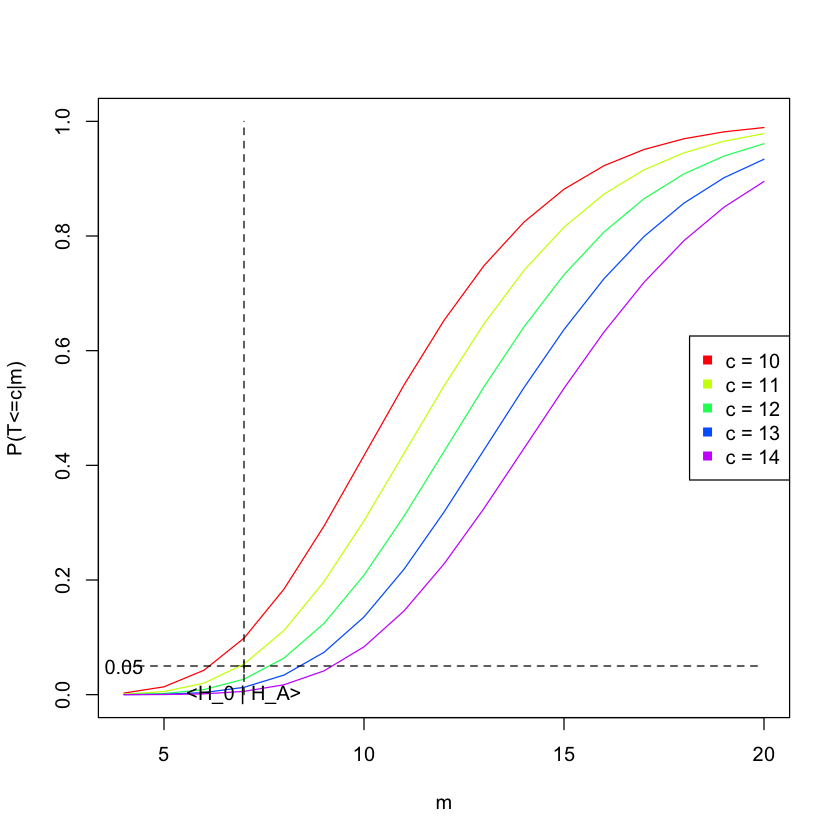

In [2]:
# choose upper bound of null hypothesis acceptance region

m = 4:20 # plausible sample means
c = 10:14 # plausible rejection regions

# plot each rejection border
col = rainbow(length(c))
plot(sum_previous_decades, alpha, pch=3, 
     xlim=c(min(m), max(m)), ylim=c(0, 1),
     xlab='m', ylab='P(T<=c|m)')
for (i in seq_along(c)) {
    p = ppois(c[i], m, lower.tail=F)
    lines(m, p, col=col[i])
}
legend("right", 
       legend=sapply(c, function(x) {paste('c =', x)}), 
       col=col, pch=15)
lines(m, rep(alpha, length(m)), col='black', lty='dashed')
text(min(m), alpha, alpha)
lines(rep(sum_previous_decades, length(m)), 
      (m-min(m))/(max(m)-min(m)), col='black', lty='dashed')
text(sum_previous_decades, 0, '<H_0 | H_A>')

- What conclusion can you draw from the above data?  

With our best estimator of the actual earthquake rate being 7, and **total** $\alpha \le 0.1$, we should reject $H_0$ if $T <= 2$ or $T > 11$. The significance level of this test is $\alpha = P(T <= 2 | m = 7) + P(T > 11 | m=7) = 0.03 + 0.05 = 0.08$, as calculated below.

Note - we can choose T > 11 only because the test is two-sided, and the other side of the test is far below its 0.05 allowance. If the test were one-sided with an alpha of 0.05, we would need to use T > 12.

In [3]:
lower_rejection = 2
upper_rejection = 11 # 1-P(x <= 11) yields P(x > 11)
p_lower = ppois(lower_rejection, sum_previous_decades)
p_upper = ppois(upper_rejection, sum_previous_decades, lower.tail=F)
cat('P(T<=2): ', p_lower, fill=T)
cat('P(T>11): ', p_upper, fill=T)
cat('P(T<=2 or T>11): ', p_lower + p_upper)

P(T<=2):  0.02963616
P(T>11):  0.05334962
P(T<=2 or T>11):  0.08298579

- Graph the power curve of your test.

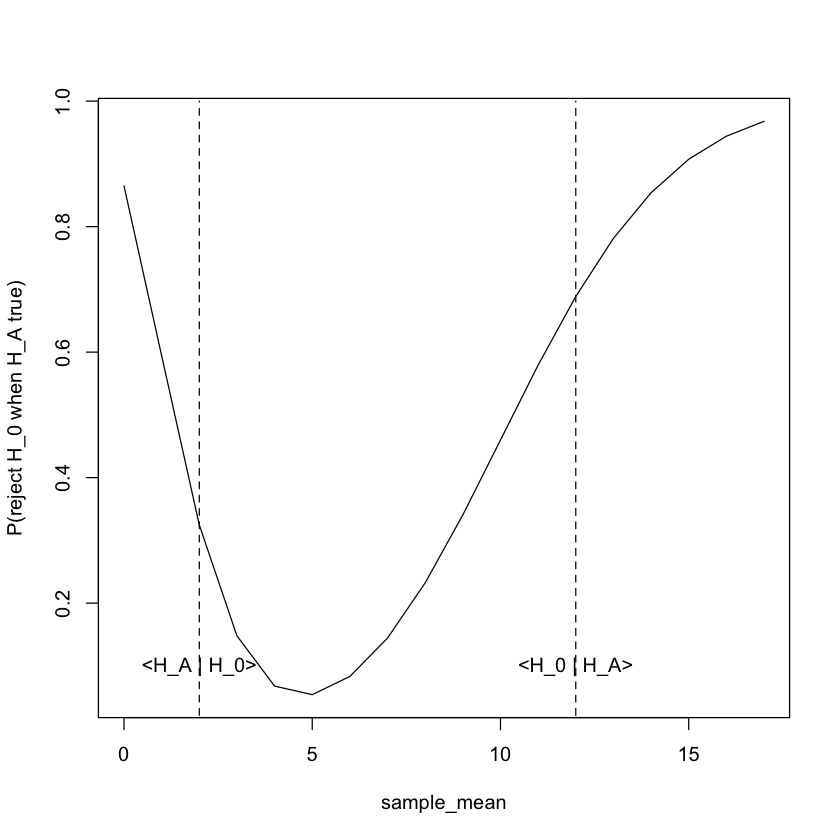

In [4]:
sample_mean = 0:17
gamma = sapply(sample_mean, function(x){
    ppois(x, lower_rejection, lower.tail=F) + ppois(x, upper_rejection)
})
plot(sample_mean, gamma, type='l',
    ylab='P(reject H_0 when H_A true)')
lines(c(2, 2), c(0, 1), col='black', lty='dashed')
text(2, 0.1, '<H_A | H_0>')
lines(c(12, 12), c(0, 1), col='black', lty='dashed')
text(12, 0.1, '<H_0 | H_A>')

We can see that the test is likely to correctly reject the null hypothesis at very low and very high sample means. In the region around sample_mean=5, we do not reject the null hypothesis, and are very unlikely to be wrong in doing so.

## 2.
Suppose that the serious accidents along a certain stretch of highway follow a Poisson distribution with a mean of 1.2 accident per week. After a reduction in the speed limit along this stretch of highway, it is hoped that this average has decreased. Construct a test for reduction based on a five-week count with α ≤ 0.07.

**Test construction:**  
 - Maximum $\alpha$: $0.07$
 - Expected 5-week sum: $1.2 * 5 = 6$
 - Plausible 5-week sums: ${0, 1, ..., 12}$
 - Plausible 5-week sum rejection regions (c where $H_0: T \ge c$): ${1, 2, ..., 6}$


**Rejection region selection:**

In [5]:
c = 1:6
p_c = sapply(c, function(x){ppois(x, 6)})
p_le_alpha = p_c[p_c <= 0.07]
max_p = max(p_le_alpha)
best_bound = c[which(p_le_alpha == max_p)]
cat('Best rejection region boundary:', best_bound, fill=T)
cat('Type I Error at boundary:', max_p)

Best rejection region boundary: 2
Type I Error at boundary: 0.0619688

**Test procedure:**
- Sum up 5 weeks of accidents after the speed limit change to use as test statistic
- If sum $\le 2$: reject null hypothesis, conclude that average number of accidents has decreased since change.  
  Else if sum $\gt 2$: fail to reject null hypothesis, conclude that evidence does not confirm decrease in accidents.

## 3.
Suppose that the moisture content per pound of a dehydrated protein concentrate is normally distributed with a mean of 3.5 and a standard deviation of 0.5. A random sample of 16 specimens, each consisting of one pound of this concentrate, is to be tested. Letting $\bar{X}$ denote the sample mean of these measurements of moisture content:
- What is the distribution of $\bar{X}$? Is it the exact or an approximate distribution?  

The distribution of $\bar{X}$ is exactly normal because the population distribution itself is known to be normal.

- What is the probability that:
  - $\bar{X}$ will exceed 3.7?

In [6]:
s = 0.5/sqrt(16)
1-pnorm(3.7, 3.5, s)

[1] 0.05479929

  - $\bar{X}$ will between 3.34 and 3.66?

In [7]:
pnorm(3.66, 3.5, s) - pnorm(3.34, 3.5, s)

[1] 0.7994549

## 4.
Quality control: A shoe factory owns a machine that cuts pieces from slabs of compressed rubber to be used as soles on a certain brand of men’s shoe. The thickness measurement of these soles are normally distributed with the standard deviation σ = 0.2 millimeters. Occasionally, for some unforeseeable reason, the mean changes from its target setting of μ = 25 millimeters. To be able to take timely corrective measures, such as readjusting the machine’s setting, it is important to monitor product quality by measuring the thickness of a random sample of soles taken periodically from the machine’s output. Suppose that the following plan is used to monitor the product quality. The thickness measurement for a random sample of 5 soles are observed, and the sample mean $\bar{X}$ is recorded. If $\bar{X}$ < 24.8 or $\bar{X}$ > 25.2, the machine is considered to be out of control. Production is then halted and the machine is readjust.
- When the true mean is μ = 25 millimeters, what is the probability that a sample will indicate “out of control”?

In [8]:
s = 0.2/sqrt(5)
p_narrow = pnorm(24.8, 25, s)
p_thick = p_narrow
p_narrow + p_thick

[1] 0.02534732

- Suppose that the true mean has changed to μ = 25.3 millimeters. What is the probability that a sample will indicate “out of control”?
(_Note: In practical operations, control charts are plotted to show the $\bar{x}$ values at successive points of time to detect any drift in the process mean._)

In [9]:
p_narrow = pnorm(24.8, 25.3, s)
p_thick = (1 - pnorm(25.2, 25.3, s))
p_narrow + p_thick

[1] 0.8682238

## 5.
A computer is programmed to make 100 draws at random with replacement from {0,0,0,0,1}, and take their sum. It does this 144 times; the average of the 144 sums is 21.13. The program is working fine. Or is it?

  Our sample size of 144 trials is more than 30 and therefore large enough to apply the Central Limit Theorem, so the distribution of trial means is approximately normal. If the program is working fine, 1 out of 5 draws should yield 1, so the average sum of 100 draws should be approximately normally distributed around $20$. Our null hypothesis is that our program is working fine and yielding sums of around 20, and our alternative hypothesis that our means are significantly greater or less than 20. To test if the sample in question justifies rejecting our null hypothesis, we can test whether the sample mean lies within the distribution's 95% confidence interval.

In [10]:
n = 144
p_expected = 20/100
z = pnorm(0.025)
interval = z * sqrt(p_expected * (1 - p_expected)/n)
p_interval = c(p_expected - interval, p_expected + interval)
p_interval*100

[1] 18.30009 21.69991

The output above shows the 95% confidence interval of our mean trial sums. Because our sample mean of 21.13 lies within the 95% confidence interval, we cannot reject the null hypothesis. The program is most likely working fine.

## EOF